## データ準備

In [2]:
import pandas as pd
import seaborn as sns

In [3]:
# データセットダウンロード
df = sns.load_dataset('tips')

In [4]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [5]:
# チップ率というカラムを追加
df['tip_rate'] = df["tip"] / df["total_bill"]

In [6]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,tip_rate
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808


## 分布の描画

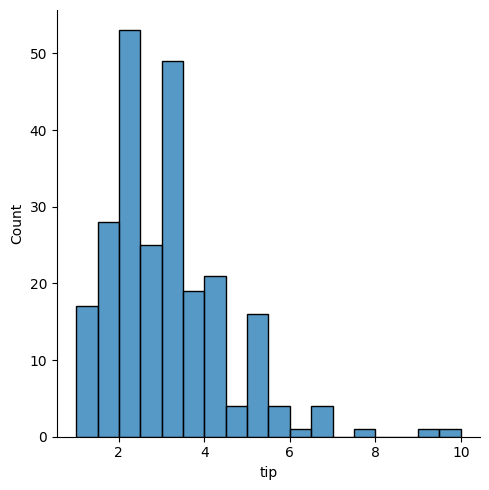

In [7]:
sns.displot(df['tip'])

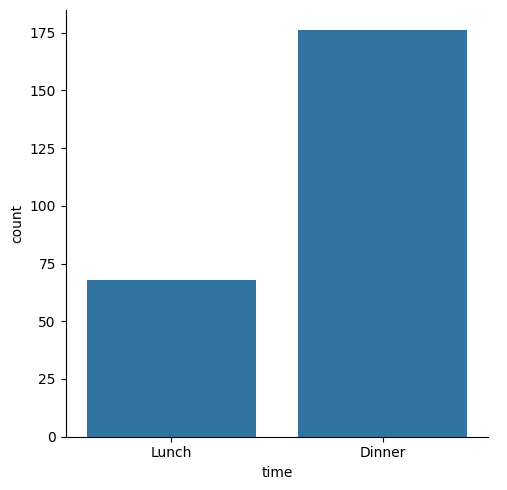

In [8]:
sns.catplot(x = 'time',data = df, kind = 'count')

## 平均値

In [9]:
import numpy as np

In [10]:
np.mean(df['tip'])

2.99827868852459

In [11]:
np.mean(df['tip_rate'])

0.16080258172250472

In [12]:
df['tip'].mean()

2.99827868852459

In [13]:
# groupby(x, observed = True) : カテゴリカルデータに対して実際にデータとして観測されたカテゴリ（カテゴリー）のみをグループ化
# mean(numeric_only = True) : 自動で数値型データのみの平均を出してくれる
df.groupby('sex', observed = True).mean(numeric_only = True)

,total_bill,tip,size,tip_rate
sex,,,,
Male,20.744076,3.089618,2.630573,0.157651
Female,18.056897,2.833448,2.459770,0.166491


<Axes: xlabel='sex', ylabel='tip_rate'>

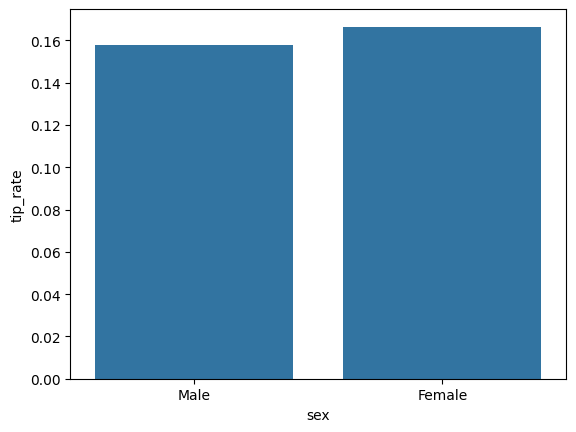

In [14]:
sns.barplot(x = 'sex', y = 'tip_rate',data = df, errorbar = None)

<Axes: xlabel='sex'>

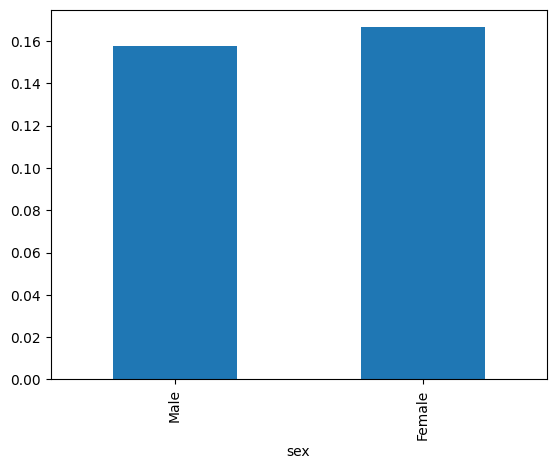

In [15]:
(df.groupby('sex', observed = True)['tip_rate'].mean()).plot(kind = 'bar')

## 中央値

In [16]:
np.median(df['tip'])

2.9

In [17]:
df['tip_rate'].median()

0.15476977125802577

In [18]:
df.groupby('sex', observed = True)['tip_rate'].median()

sex
Male      0.153492
Female    0.155581
Name: tip_rate, dtype: float64

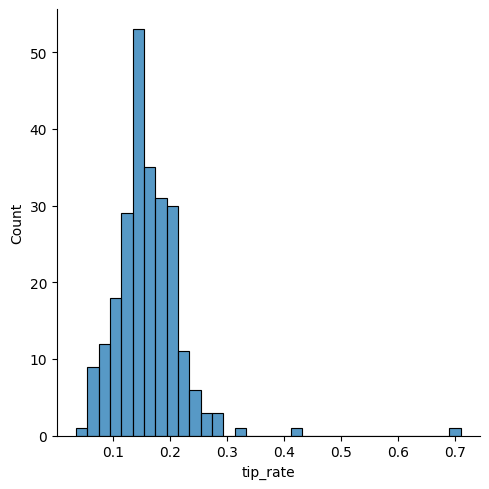

In [19]:
sns.displot(df['tip_rate'])

<Axes: xlabel='sex', ylabel='tip_rate'>

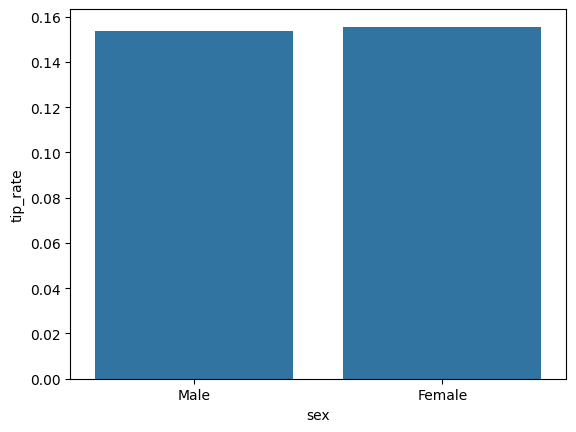

In [20]:
sns.barplot(x = 'sex', y = 'tip_rate', data = df, estimator = 'median', errorbar = None)

In [21]:
df.sort_values('tip_rate', ascending = False)

,total_bill,tip,sex,smoker,day,time,size,tip_rate
172,7.25,5.15,Male,Yes,Sun,Dinner,2,0.710345
178,9.60,4.00,Female,Yes,Sun,Dinner,2,0.416667
67,3.07,1.00,Female,Yes,Sat,Dinner,1,0.325733
232,11.61,3.39,Male,No,Sat,Dinner,2,0.291990
183,23.17,6.50,Male,Yes,Sun,Dinner,4,0.280535
...,...,...,...,...,...,...,...,...
187,30.46,2.00,Male,Yes,Sun,Dinner,5,0.065660
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
57,26.41,1.50,Female,No,Sat,Dinner,2,0.056797
102,44.30,2.50,Female,Yes,Sat,Dinner,3,0.056433


## 最頻値

In [22]:
from scipy import stats

In [23]:
# stats.mode()は数値カラムに対応、カテゴリカルカラムには対応していない
mode, count = stats.mode(df['size'])
print(mode)
print(count)

2
156


In [24]:
df['time'].mode()

0    Dinner
Name: time, dtype: category
Categories (2, object): ['Lunch', 'Dinner']

## 範囲

In [25]:
np.min(df['tip'])

1.0

In [26]:
df['tip'].min()

1.0

In [27]:
df.groupby('sex', observed = True).min(numeric_only = True)

,total_bill,tip,size,tip_rate
sex,,,,
Male,7.25,1.0,1,0.035638
Female,3.07,1.0,1,0.056433


In [28]:
df['tip'].max()

10.0

In [29]:
df.groupby('sex', observed = True).max(numeric_only = True)

,total_bill,tip,size,tip_rate
sex,,,,
Male,50.81,10.0,6,0.710345
Female,44.30,6.5,6,0.416667


In [30]:
df['tip'].max() - df['tip'].min()

9.0

## 四分位数

In [31]:
np.quantile(df['tip_rate'], [0.25, 0.5, 0.75])

array([0.12912736, 0.15476977, 0.19147549])

In [32]:
df['tip_rate'].quantile([0.25, 0.5, 0.75])

0.25    0.129127
0.50    0.154770
0.75    0.191475
Name: tip_rate, dtype: float64

In [33]:
# IQR
stats.iqr(df['tip_rate'])

0.06234812458689151

In [34]:
# QD
stats.iqr(df['tip_rate']) / 2

0.031174062293445756

In [35]:
import matplotlib.pyplot as plt

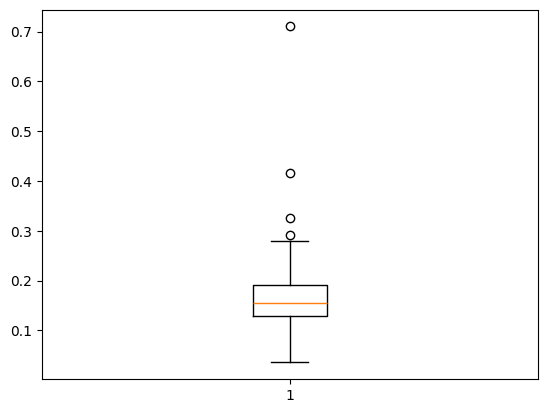

In [36]:
# ひげの長さ ： Q1-1.5IQR, Q3+1.5IQR
plt.boxplot(df['tip_rate'])
plt.show()

<Axes: xlabel='sex', ylabel='tip_rate'>

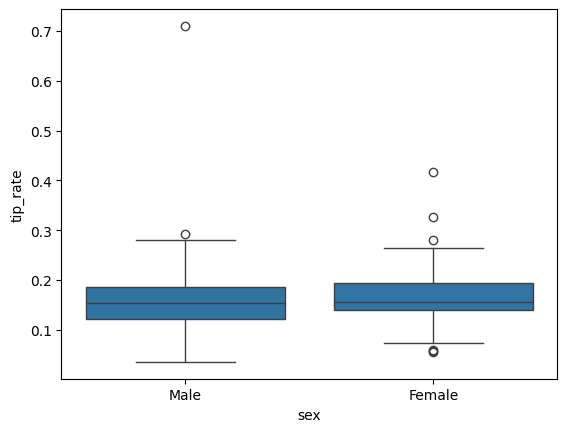

In [37]:
sns.boxplot(x = 'sex', y = 'tip_rate', data = df)

## 分散と標準偏差

In [38]:
np.var(df['tip'])

1.9066085124966412

In [39]:
np.std(df['tip'])

1.3807999538298954

## 共分散

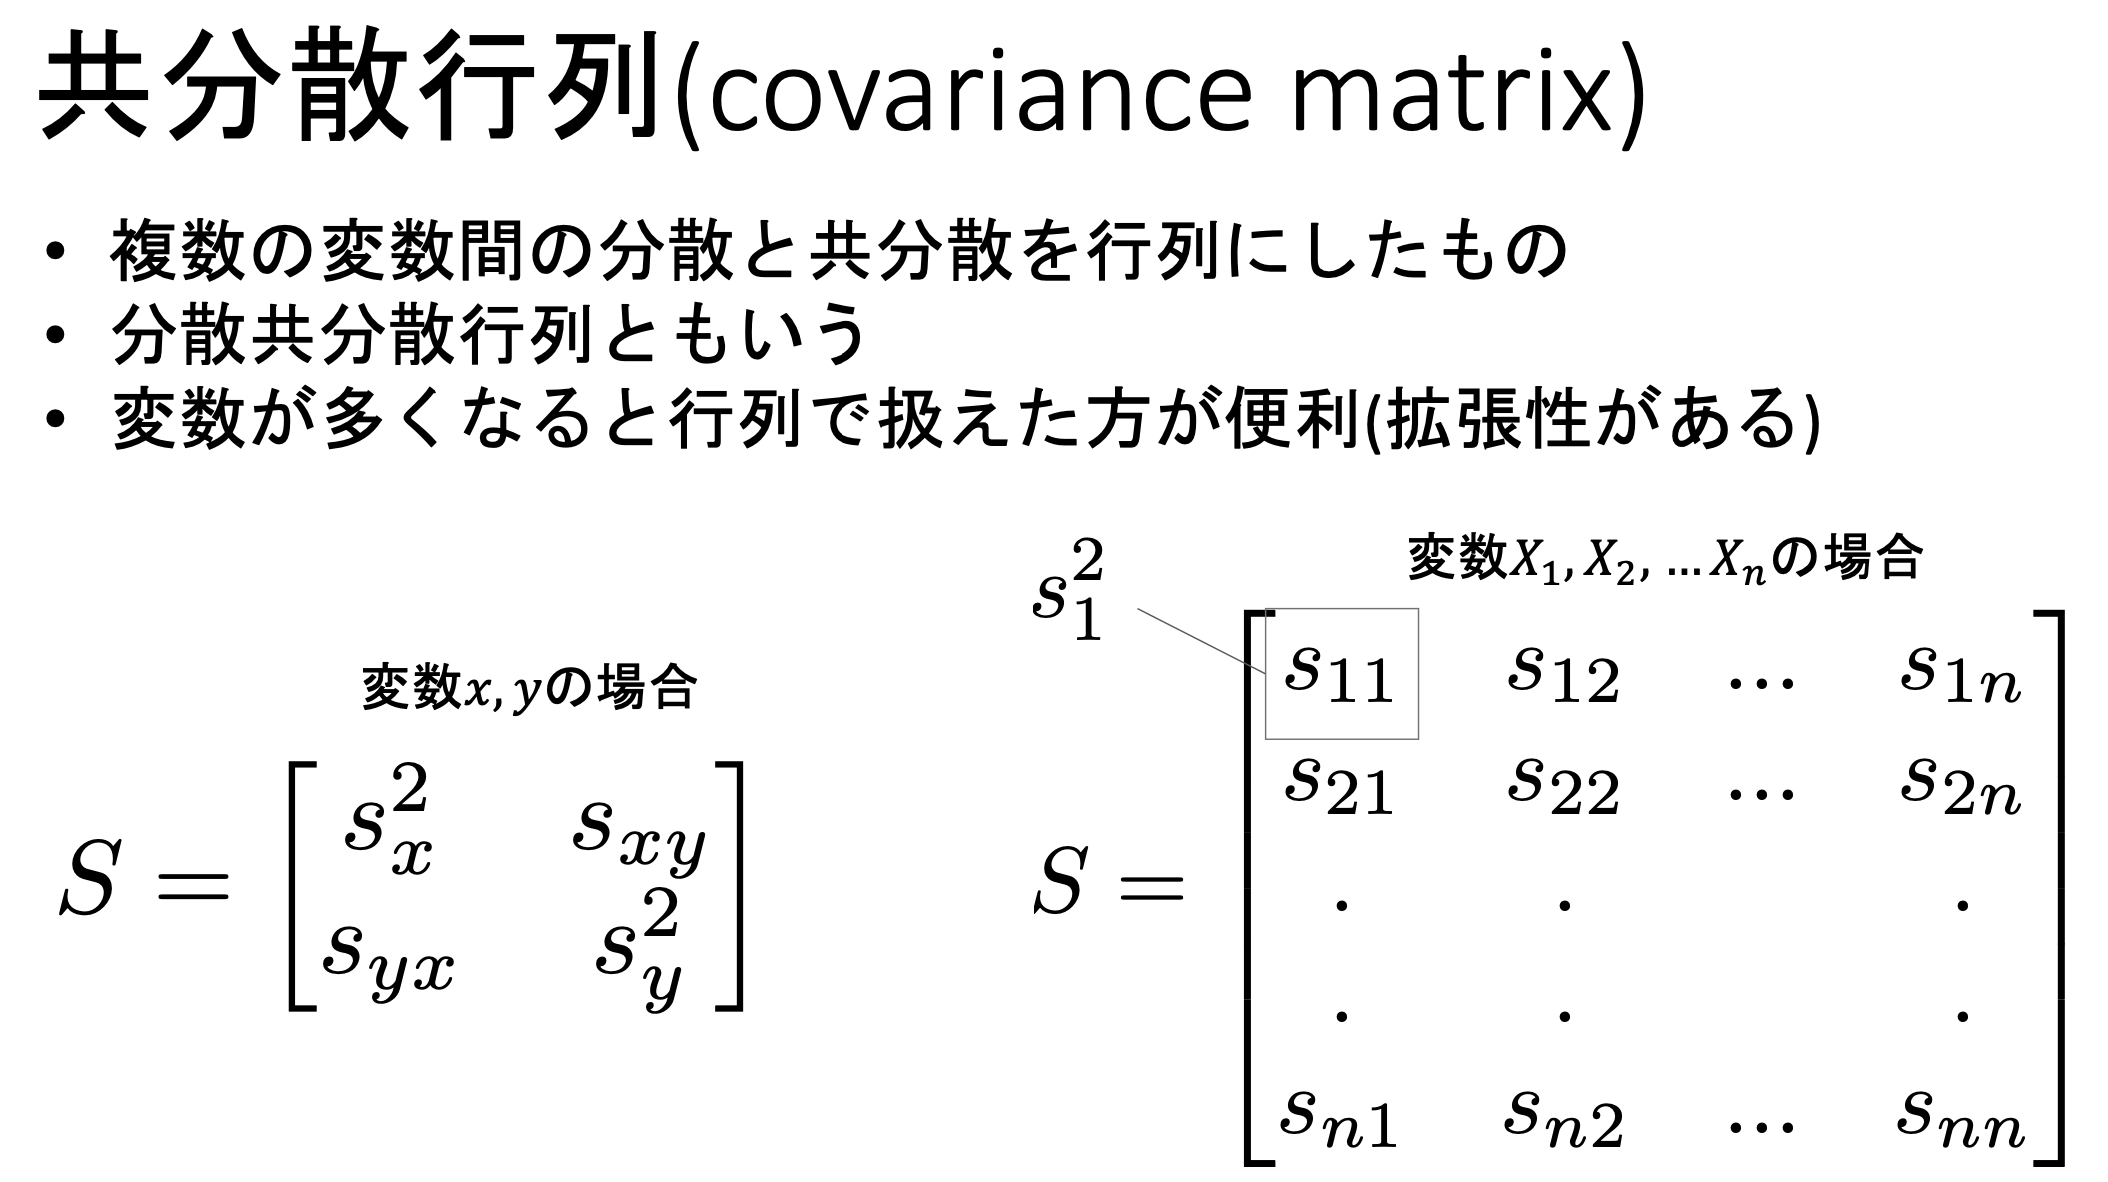

In [40]:
np.cov(df['tip'], df['total_bill']) # 不偏共分散行列が出力されている（n-1で割られている）

array([[ 1.91445464,  8.32350163],
       [ 8.32350163, 79.25293861]])

In [41]:
np.cov(df['tip'], df['total_bill'], bias = True) # 共分散行列が出力される

array([[ 1.90660851,  8.28938892],
       [ 8.28938892, 78.92813149]])

In [42]:
# 行方向に連結
# [total_bill]
# [tip]
# [size]
np.stack([df['total_bill'], df['tip'], df['size']], axis = 0).shape

(3, 244)

In [43]:
x = np.stack([df['total_bill'], df['tip'], df['size']], axis = 0)
np.cov(x, bias = True)

array([[78.92813149,  8.28938892,  5.04522121],
       [ 8.28938892,  1.90660851,  0.64126747],
       [ 5.04522121,  0.64126747,  0.9008835 ]])

In [46]:
# 各カラムのスケールが異なるので、共分散行列から相関関係については分からない
df.select_dtypes(exclude = 'category').cov()

,total_bill,tip,size,tip_rate
total_bill,79.252939,8.323502,5.065983,-0.184107
tip,8.323502,1.914455,0.643906,0.028931
size,5.065983,0.643906,0.904591,-0.008298
tip_rate,-0.184107,0.028931,-0.008298,0.003730


In [45]:
df.cov(numeric_only = True)

,total_bill,tip,size,tip_rate
total_bill,79.252939,8.323502,5.065983,-0.184107
tip,8.323502,1.914455,0.643906,0.028931
size,5.065983,0.643906,0.904591,-0.008298
tip_rate,-0.184107,0.028931,-0.008298,0.003730
